In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.preprocessing import PolynomialFeatures
# Reading the dataset
file_path = "Telco-Customer-Churn.csv"  
df = pd.read_csv(file_path)


df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# General information about data settings
df.info()

# Checking for missing values
df.isnull().sum()

# Determination of categorical and continuous variables
categorical_features = df.select_dtypes(include=['object']).columns
continuous_features = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Features:", categorical_features)
print("Continuous Features:", continuous_features)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


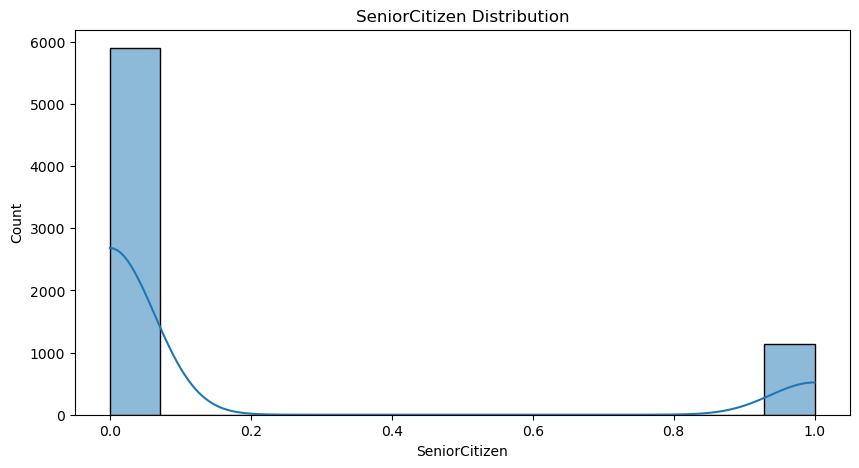

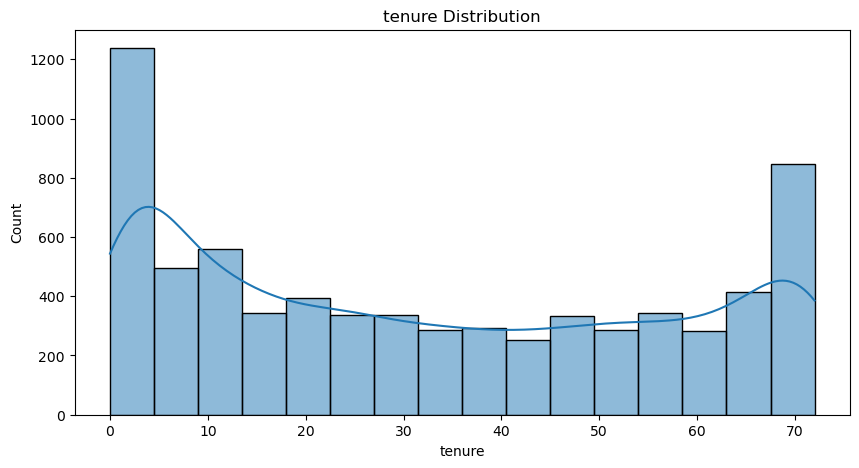

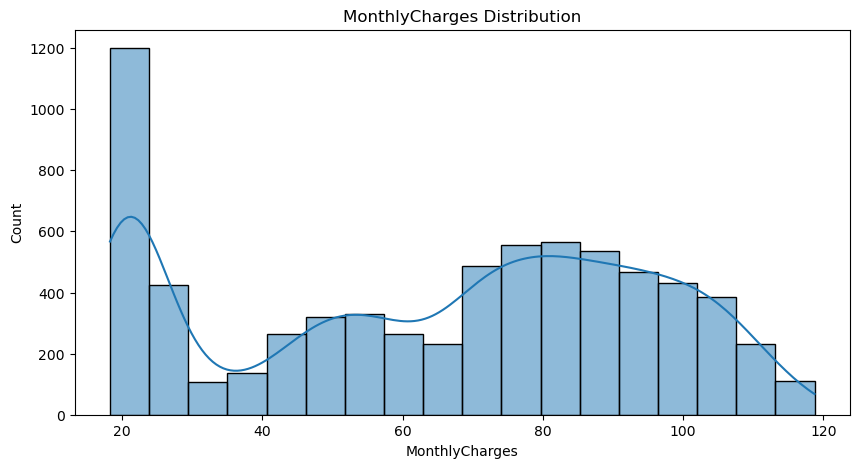

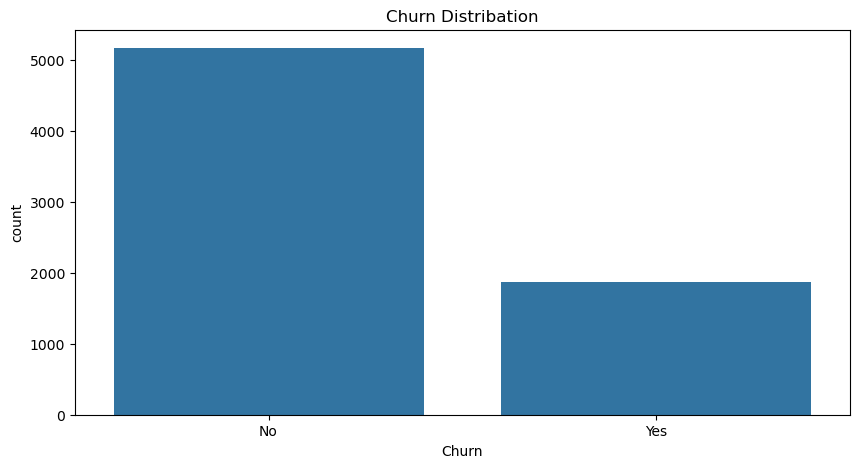

In [3]:
# Visualize the distribution of continuous features
for feature in continuous_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution')
    plt.show()

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 5))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribation')
plt.show()


In [4]:
target = 'Churn'
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (5634, 20)
Test set size: (1409, 20)


In [5]:
# Identifying categorical and continuous features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
continuous_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, continuous_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Add the model to the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(max_iter=1000))])

# Train the model with the training set
pipeline.fit(X_train, y_train)

# Make predictions with test set
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluate the results
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


              precision    recall  f1-score   support

          No       0.86      0.91      0.88      1036
         Yes       0.70      0.60      0.64       373

    accuracy                           0.83      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.83      0.82      1409

ROC AUC Score: 0.8612302938710445


In [6]:
# model pipeline
unscaled_pipeline = Pipeline(steps=[('preprocessor', ColumnTransformer(
    transformers=[
        ('num', 'passthrough', continuous_features),
        ('cat', categorical_transformer, categorical_features)
    ])),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Unscaled model training
unscaled_pipeline.fit(X_train, y_train)

# Make predictions with test set
y_pred_unscaled = unscaled_pipeline.predict(X_test)
y_pred_proba_unscaled = unscaled_pipeline.predict_proba(X_test)[:, 1]

# Evaluate the results
print("Unscaled Model Results")
print(classification_report(y_test, y_pred_unscaled))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_unscaled))

print("\nScaled Model Results")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


Unscaled Model Results
              precision    recall  f1-score   support

          No       0.86      0.91      0.88      1036
         Yes       0.70      0.60      0.64       373

    accuracy                           0.83      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.83      0.82      1409

ROC AUC Score: 0.8612070036332771

Scaled Model Results
              precision    recall  f1-score   support

          No       0.86      0.91      0.88      1036
         Yes       0.70      0.60      0.64       373

    accuracy                           0.83      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.83      0.82      1409

ROC AUC Score: 0.8612302938710445


In [7]:
from sklearn.model_selection import cross_val_score

# Model evaluation with cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print("Cross Validation Scores:", scores)
print("Average Cross Validation Score:", scores.mean())


Cross Validation Scores: [0.80411639 0.81476224 0.78779276 0.80681818 0.80255682]
Average Cross Validation Score: 0.8032092796309438


In [8]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Features 
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Extend the pipeline
preprocessor_with_poly = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('poly', poly)
        ]), continuous_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the model pipeline
pipeline_with_poly = Pipeline(steps=[('preprocessor', preprocessor_with_poly),
                                     ('classifier', LogisticRegression(max_iter=1000))])

pipeline_with_poly.fit(X_train, y_train)

# Make predictions with the test set
y_pred_with_poly = pipeline_with_poly.predict(X_test)
y_pred_proba_with_poly = pipeline_with_poly.predict_proba(X_test)[:, 1]

print("Model Results with Interaction Terms Added")
print(classification_report(y_test, y_pred_with_poly))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_with_poly))


Model Results with Interaction Terms Added
              precision    recall  f1-score   support

          No       0.86      0.91      0.88      1036
         Yes       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

ROC AUC Score: 0.8616521059550549


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Decision Tree
pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier())])
pipeline_dt.fit(X_train, y_train)
y_pred_dt = pipeline_dt.predict(X_test)
y_pred_proba_dt = pipeline_dt.predict_proba(X_test)[:, 1]

print("Decision Tree Model Results")
print(classification_report(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_dt))

# Random Forest
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100))])
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_proba_rf = pipeline_rf.predict_proba(X_test)[:, 1]

print("Random Forest Model Results")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))

# Gradient Boosting
pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier())])
pipeline_gb.fit(X_train, y_train)
y_pred_gb = pipeline_gb.predict(X_test)
y_pred_proba_gb = pipeline_gb.predict_proba(X_test)[:, 1]

print("Gradient Boosting Model Results")
print(classification_report(y_test, y_pred_gb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_gb))

# SVM
pipeline_svm = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC(probability=True))])
pipeline_svm.fit(X_train, y_train)
y_pred_svm = pipeline_svm.predict(X_test)
y_pred_proba_svm = pipeline_svm.predict_proba(X_test)[:, 1]

print("SVM Model Results")
print(classification_report(y_test, y_pred_svm))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_svm))


Decision Tree Model Results
              precision    recall  f1-score   support

          No       0.83      0.88      0.85      1036
         Yes       0.59      0.49      0.54       373

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.69      1409
weighted avg       0.77      0.78      0.77      1409

ROC AUC Score: 0.6853553572722473
Random Forest Model Results
              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1036
         Yes       0.67      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

ROC AUC Score: 0.8438363679650545
Gradient Boosting Model Results
              precision    recall  f1-score   support

          No       0.84      0.92      0.88      1036
         Yes       0.71      0.51      0.60       373

    accuracy              

In [10]:
logistic_regression_model = pipeline.named_steps['classifier']
print("Logistic Regression Katsayıları:", logistic_regression_model.coef_)

# Decision Tree (Making it explainable with a small tree)
small_tree = DecisionTreeClassifier(max_depth=3)
pipeline_small_tree = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('classifier', small_tree)])
pipeline_small_tree.fit(X_train, y_train)
y_pred_small_tree = pipeline_small_tree.predict(X_test)
print("Small Decision Tree Model Results")
print(classification_report(y_test, y_pred_small_tree))


Logistic Regression Katsayıları: [[ 0.06274927 -0.82115568 -0.18889177 ...  0.28188462 -0.37425603
  -0.39469072]]
Small Decision Tree Model Results
              precision    recall  f1-score   support

          No       0.81      0.94      0.87      1036
         Yes       0.71      0.39      0.50       373

    accuracy                           0.80      1409
   macro avg       0.76      0.67      0.69      1409
weighted avg       0.78      0.80      0.77      1409



In [26]:
def evaluate_model(y_true, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label='Yes')
    recall = recall_score(y_true, y_pred, pos_label='Yes')
    f1 = f1_score(y_true, y_pred, pos_label='Yes')
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    avg_precision = average_precision_score(y_true, y_pred_proba, pos_label='Yes')
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'average_precision': avg_precision
    }


In [27]:
# Logistic Regression
log_reg_results = evaluate_model(y_test, y_pred, y_pred_proba)
print("Logistic Regression Results:", log_reg_results)

# Decision Tree
dt_results = evaluate_model(y_test, y_pred_dt, y_pred_proba_dt)
print("Decision Tree Results:", dt_results)

# Random Forest
rf_results = evaluate_model(y_test, y_pred_rf, y_pred_proba_rf)
print("Random Forest Results:", rf_results)

# Gradient Boosting
gb_results = evaluate_model(y_test, y_pred_gb, y_pred_proba_gb)
print("Gradient Boosting Results:", gb_results)

# SVM
svm_results = evaluate_model(y_test, y_pred_svm, y_pred_proba_svm)
print("SVM Results:", svm_results)

# Small Decision Tree
small_tree_results = evaluate_model(y_test, y_pred_small_tree, pipeline_small_tree.predict_proba(X_test)[:, 1])
print("Small Decision Tree Results:", small_tree_results)


Logistic Regression Results: {'accuracy': 0.8261178140525195, 'precision': 0.7025316455696202, 'recall': 0.5951742627345844, 'f1_score': 0.6444121915820029, 'roc_auc': 0.8612302938710445, 'average_precision': 0.6801069023122899}
Decision Tree Results: {'accuracy': 0.772888573456352, 'precision': 0.5857605177993528, 'recall': 0.48525469168900803, 'f1_score': 0.530791788856305, 'roc_auc': 0.6808512840684423, 'average_precision': 0.42050989539450745}
Random Forest Results: {'accuracy': 0.7970191625266146, 'precision': 0.6719367588932806, 'recall': 0.45576407506702415, 'f1_score': 0.5431309904153354, 'roc_auc': 0.8462391441613962, 'average_precision': 0.6506872969683524}
Gradient Boosting Results: {'accuracy': 0.8140525195173882, 'precision': 0.7018181818181818, 'recall': 0.517426273458445, 'f1_score': 0.595679012345679, 'roc_auc': 0.8629887068224869, 'average_precision': 0.6995991900865108}
SVM Results: {'accuracy': 0.8147622427253371, 'precision': 0.6971830985915493, 'recall': 0.53083109

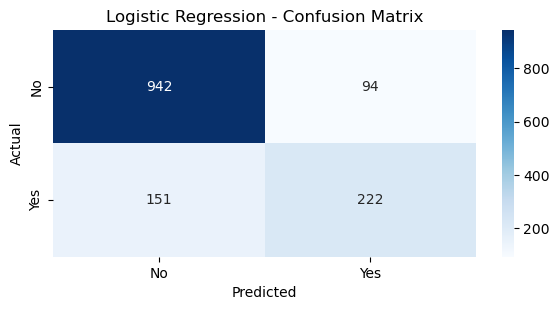

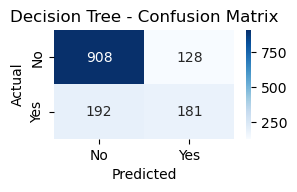

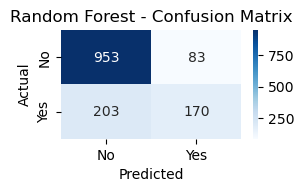

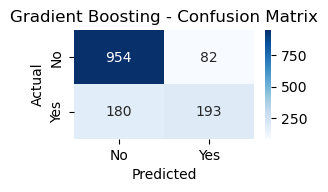

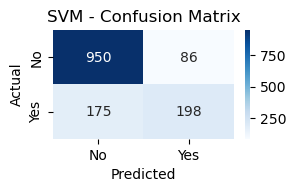

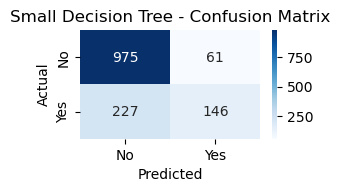

<Figure size 640x480 with 0 Axes>

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

models = {
    "Logistic Regression": (y_test, y_pred),
    "Decision Tree": (y_test, y_pred_dt),
    "Random Forest": (y_test, y_pred_rf),
    "Gradient Boosting": (y_test, y_pred_gb),
    "SVM": (y_test, y_pred_svm),
    "Small Decision Tree": (y_test, y_pred_small_tree)
}

plt.figure(figsize=(15, 10))
for i, (name, (y_true, y_pred)) in enumerate(models.items()):
    plt.subplot(3, 2, i + 1)
    plot_confusion_matrix(y_true, y_pred, title=name + " - Confusion Matrix")

plt.tight_layout()
plt.show()


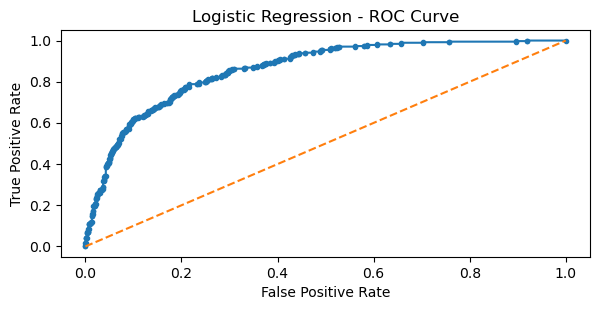

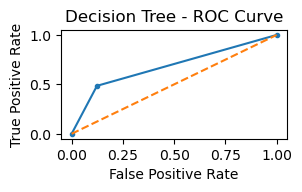

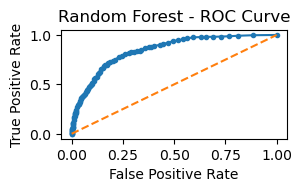

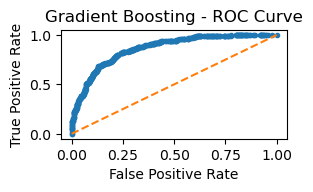

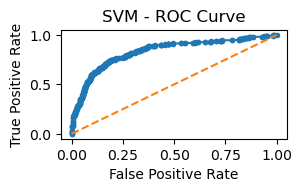

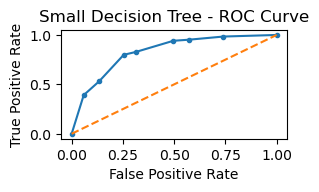

<Figure size 640x480 with 0 Axes>

In [31]:
from sklearn.metrics import roc_curve

def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba, pos_label='Yes')
    plt.plot(fpr, tpr, marker='.')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.show()

models_proba = {
    "Logistic Regression": (y_test, y_pred_proba),
    "Decision Tree": (y_test, y_pred_proba_dt),
    "Random Forest": (y_test, y_pred_proba_rf),
    "Gradient Boosting": (y_test, y_pred_proba_gb),
    "SVM": (y_test, y_pred_proba_svm),
    "Small Decision Tree": (y_test, pipeline_small_tree.predict_proba(X_test)[:, 1])
}

plt.figure(figsize=(15, 10))
for i, (name, (y_true, y_pred_proba)) in enumerate(models_proba.items()):
    plt.subplot(3, 2, i + 1)
    plot_roc_curve(y_true, y_pred_proba, title=name + " - ROC Curve")

plt.tight_layout()
plt.show()


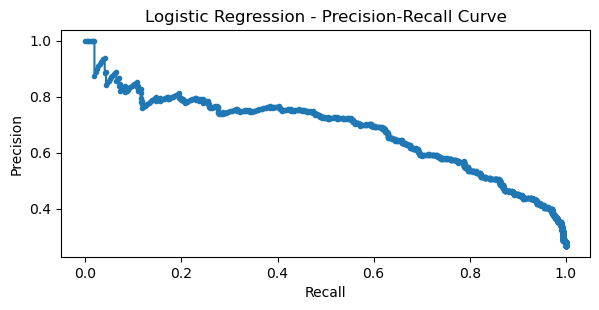

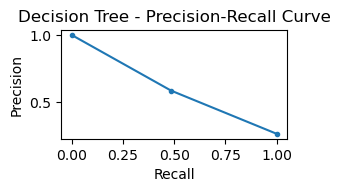

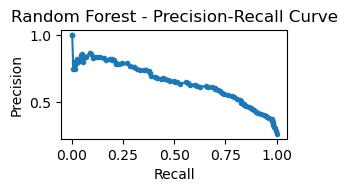

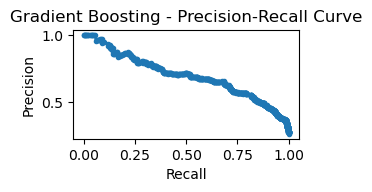

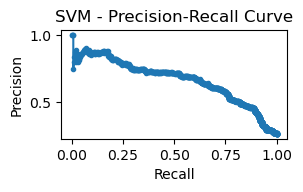

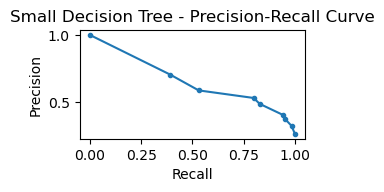

<Figure size 640x480 with 0 Axes>

In [32]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(y_true, y_pred_proba, title):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba, pos_label='Yes')
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.show()

plt.figure(figsize=(15, 10))
for i, (name, (y_true, y_pred_proba)) in enumerate(models_proba.items()):
    plt.subplot(3, 2, i + 1)
    plot_precision_recall_curve(y_true, y_pred_proba, title=name + " - Precision-Recall Curve")

plt.tight_layout()
plt.show()


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# Function that calculates performance metrics
def evaluate_model(y_true, y_pred, y_pred_proba):

    y_true_bin = [1 if label == 'Yes' else 0 for label in y_true]
    y_pred_bin = [1 if label == 'Yes' else 0 for label in y_pred]
    
    accuracy = accuracy_score(y_true_bin, y_pred_bin)
    precision = precision_score(y_true_bin, y_pred_bin)
    recall = recall_score(y_true_bin, y_pred_bin)
    f1 = f1_score(y_true_bin, y_pred_bin)
    roc_auc = roc_auc_score(y_true_bin, y_pred_proba)
    avg_precision = average_precision_score(y_true_bin, y_pred_proba)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'average_precision': avg_precision
    }

# Calculate performance metrics for models
log_reg_results = evaluate_model(y_test, y_pred, y_pred_proba)
dt_results = evaluate_model(y_test, y_pred_dt, y_pred_proba_dt)
rf_results = evaluate_model(y_test, y_pred_rf, y_pred_proba_rf)
gb_results = evaluate_model(y_test, y_pred_gb, y_pred_proba_gb)
svm_results = evaluate_model(y_test, y_pred_svm, y_pred_proba_svm)
small_tree_results = evaluate_model(y_test, y_pred_small_tree, pipeline_small_tree.predict_proba(X_test)[:, 1])

# Bringing all results together
results = pd.DataFrame({
    'Logistic Regression': log_reg_results,
    'Decision Tree': dt_results,
    'Random Forest': rf_results,
    'Gradient Boosting': gb_results,
    'SVM': svm_results,
    'Small Decision Tree': small_tree_results
})

# Making results more readable by transposing them
results = results.T
results


,accuracy,precision,recall,f1,roc_auc,average_precision
Logistic Regression,0.826118,0.702532,0.595174,0.644412,0.861230,0.680107
Decision Tree,0.775727,0.591640,0.493298,0.538012,0.685355,0.425992
Random Forest,0.797019,0.673307,0.453083,0.541667,0.843836,0.640037
Gradient Boosting,0.814762,0.705882,0.514745,0.595349,0.862925,0.699036
SVM,0.814762,0.697183,0.530831,0.602740,0.833466,0.668029
Small Decision Tree,0.795600,0.705314,0.391421,0.503448,0.828240,0.579153


In [12]:
# Determining the best model according to its metrics
best_accuracy_model = results['accuracy'].idxmax()
best_precision_model = results['precision'].idxmax()
best_recall_model = results['recall'].idxmax()
best_f1_model = results['f1'].idxmax()
best_roc_auc_model = results['roc_auc'].idxmax()
best_avg_precision_model = results['average_precision'].idxmax()

print(f"Best model by accuracy: {best_accuracy_model}")
print(f"Best model by precision: {best_precision_model}")
print(f"Best model by recall: {best_recall_model}")
print(f"Best model by f1: {best_f1_model}")
print(f"Best model by roc_auc: {best_roc_auc_model}")
print(f"Best model by average precision: {best_avg_precision_model}")


Best model by accuracy: Logistic Regression
Best model by precision: Gradient Boosting
Best model by recall: Logistic Regression
Best model by f1: Logistic Regression
Best model by roc_auc: Gradient Boosting
Best model by average precision: Gradient Boosting
